In [ ]:
from paddleocr import PaddleOCR 

ocr = PaddleOCR(use_angle_cls=True, lang='en')  # need to run only once to download and load model into memory
img_path = 'matricula.jpg'
result = ocr.predict(img_path)[0]

print(result['rec_texts'], result['rec_scores'])

In [3]:
from transformers import AutoProcessor, AutoModelForImageTextToText
import torch
Device = "cpu"  # or "cpu"

processor = AutoProcessor.from_pretrained("HuggingFaceTB/SmolVLM-Instruct")
model = AutoModelForImageTextToText.from_pretrained("HuggingFaceTB/SmolVLM-Instruct",
                                                dtype=torch.bfloat16,
                                                _attn_implementation="flash_attention_2" if Device == "cuda" else "eager").to(Device)

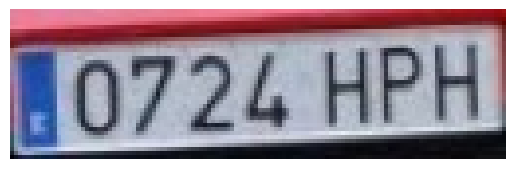

User:<row_1_col_1><row_1_col_2><row_1_col_3><row_1_col_4>
<row_2_col_1><row_2_col_2><row_2_col_3><row_2_col_4>

<global-img>Can you give me the text in the license plate of the image?
Assistant: 0724HPH


In [4]:
from PIL import Image
from transformers.image_utils import load_image
from matplotlib import pyplot as plt

# Load images

image_1 = Image.open('./content_p4b/matricula.jpg')
# Create input messages
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image"},
            {"type": "text", "text": "Can you give me the text in the license plate of the image?"}
        ]
    },
]

# Prepare inputs
prompt = processor.apply_chat_template(messages, add_generation_prompt=True)
inputs = processor(text=prompt, images=[image_1], return_tensors="pt")
inputs = inputs.to(Device)

generated_ids = model.generate(**inputs, max_new_tokens=10)
generated_texts = processor.batch_decode(
    generated_ids,
    skip_special_tokens=True,
)

plt.imshow(image_1)
plt.axis('off')
plt.show()
print(generated_texts[0])